# EDA
---
# 1. Imports:
1. Pandas
2. Numpy
3. Matplotlib
4. seaborn

In [485]:
import pandas as pd
print("pandas: " + pd.__version__)
import numpy as np
print("numpy:" + np.__version__)
import matplotlib.pyplot as plt
print("matplotlib: " + np.__version__)
import seaborn as sns
print("seaborn: " + sns.__version__)

print("All libraries imported!")
# Plots direkt im Notebook anzeigen
%matplotlib inline

pandas: 2.2.3
numpy:2.1.3
matplotlib: 2.1.3
seaborn: 0.13.2
All libraries imported!


Loading Data:

In [486]:
# Pfad zum Datensatz
data_path = "../data/raw/cardio_train.csv"
df = pd.read_csv(data_path, sep=";")
print("data is loaded")

data is loaded


---
# Data Exploration:
## head, info and columns

In [487]:
# first look on data:
print("-----------------------------------------------------------")
print("head:")
print(df.head()) # showes all columns with the first 5 (0-4) data sets
print("-----------------------------------------------------------")
print()
print("-----------------------------------------------------------")
print("/ln info:")# Shows the first 5 rows
print(df.info())         # Shows columns, types, and missing values
print("-----------------------------------------------------------")
print()
print("-----------------------------------------------------------")
print(df.columns)
print("-----------------------------------------------------------")

-----------------------------------------------------------
head:
   id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  18393       2     168    62.0    110     80            1     1      0   
1   1  20228       1     156    85.0    140     90            3     1      0   
2   2  18857       1     165    64.0    130     70            3     1      0   
3   3  17623       2     169    82.0    150    100            1     1      0   
4   4  17474       1     156    56.0    100     60            1     1      0   

   alco  active  cardio  
0     0       1       0  
1     0       1       1  
2     0       0       1  
3     0       1       1  
4     0       0       0  
-----------------------------------------------------------

-----------------------------------------------------------
/ln info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------    


### **Cardiovascular Disease Dataset — Feature Overview**

| **Feature Name**                   | **Category**           | **Column Name** | **Data Type / Values**                  | **Description**                                |
|------------------------------------|------------------------|-----------------|------------------------------------------|------------------------------------------------|
| Age                               | Objective Feature      | `age`           | int (days)                              | Patient age (in days)                          |
| Height                            | Objective Feature      | `height`        | int (cm)                                | Patient height (centimeters)                   |
| Weight                            | Objective Feature      | `weight`        | float (kg)                              | Patient weight (kilograms)                     |
| Gender                            | Objective Feature      | `gender`        | categorical code                        | 1: woman, 2: man                               |
| Systolic blood pressure           | Examination Feature    | `ap_hi`         | int                                     | Systolic blood pressure (mm Hg)                |
| Diastolic blood pressure          | Examination Feature    | `ap_lo`         | int                                     | Diastolic blood pressure (mm Hg)               |
| Cholesterol                       | Examination Feature    | `cholesterol`   | 1: normal, 2: above normal, 3: well above normal | Cholesterol level                     |
| Glucose                           | Examination Feature    | `gluc`          | 1: normal, 2: above normal, 3: well above normal | Glucose level                         |
| Smoking                           | Subjective Feature     | `smoke`         | binary (0: no, 1: yes)                  | Whether patient smokes or not                  |
| Alcohol intake                    | Subjective Feature     | `alco`          | binary (0: no, 1: yes)                  | Whether patient consumes alcohol               |
| Physical activity                 | Subjective Feature     | `active`        | binary (0: no, 1: yes)                  | Whether patient is physically active           |
| Cardiovascular disease (target)   | Target Variable        | `cardio`        | binary (0: no, 1: yes)                  | Presence (1) or absence (0) of disease         |

### **Value Encoding Notes**
- **`cholesterol` & `gluc`:**
  - 1 = normal
  - 2 = above normal
  - 3 = well above normal
- **`gender`:**
  - 1 = woman
  - 2 = man
- **`smoke`, `alco`, `active`, `cardio`:**
  - 0 = no
  - 1 = yes

---
## Describe:

In [488]:
print("-----------------------------------------------------------")
print("describe:")
print(df.describe())     # Basic statistics
print("-----------------------------------------------------------")

-----------------------------------------------------------
describe:
                 id           age        gender        height        weight  \
count  70000.000000  70000.000000  70000.000000  70000.000000  70000.000000   
mean   49972.419900  19468.865814      1.349571    164.359229     74.205690   
std    28851.302323   2467.251667      0.476838      8.210126     14.395757   
min        0.000000  10798.000000      1.000000     55.000000     10.000000   
25%    25006.750000  17664.000000      1.000000    159.000000     65.000000   
50%    50001.500000  19703.000000      1.000000    165.000000     72.000000   
75%    74889.250000  21327.000000      2.000000    170.000000     82.000000   
max    99999.000000  23713.000000      2.000000    250.000000    200.000000   

              ap_hi         ap_lo   cholesterol          gluc         smoke  \
count  70000.000000  70000.000000  70000.000000  70000.000000  70000.000000   
mean     128.817286     96.630414      1.366871      1.22645

### `df.describe()` Output — Statistic Meaning Table Expination:

| **Statistic** | **Meaning**                                                                                                  |
|---------------|-------------------------------------------------------------------------------------------------------------|
| count         | Number of non-missing (non-NaN) entries per column (should be 70,000 for a complete dataset)                |
| mean          | Average value                                                                                               |
| std           | Standard deviation (spread/variability)                                                                     |
| min           | Minimum value found                                                                                         |
| 25%           | 25th percentile (lower quartile) — 25% of values are below this                                             |
| 50%           | Median (50th percentile) — half the values are below, half above                                            |
| 75%           | 75th percentile (upper quartile) — 75% of values are below this                                             |
| max           | Maximum value found                                                                                         |

#### Analysis:
####  `df.describe()` Output

##### **1. `id`**
- **Range:** 0 to 99,999 (but only 70,000 rows in the dataset).
- **Usage:** Just a row identifier; not relevant for analysis.

##### **2. `age`**
- **Mean:** 19,469 days (~53.3 years).
- **Min:** 10,798 days (~29.6 years).
- **Max:** 23,713 days (~64.9 years).
- **Distribution:** Most values (middle 50%) are between ~48 and ~58 years.
- **Action:** Age is in days—convert to years for easier interpretation.

##### **3. `gender`**
- **Values:** 1 or 2 (likely 1=woman, 2=man).
- **Distribution:** Median and quartiles show about half are coded as 1, half as 2.
- **Action:** Double-check the dataset documentation for the exact meaning of codes.

##### **4. `height`**
- **Mean:** 164.4 cm.
- **Min:** 55 cm (unrealistically low—likely an error).
- **Max:** 250 cm (unrealistically high—likely an error).
- **Distribution:** Median 165 cm, standard deviation 8.2 cm.
- **Action:** Check and possibly remove or fix extreme outlier values.

##### **5. `weight`**
- **Mean:** 74.2 kg.
- **Min:** 10 kg (very low, likely a data entry error).
- **Max:** 200 kg (high but possible).
- **Distribution:** Median 72 kg, standard deviation 14.4 kg.
- **Action:** Consider filtering out unrealistic values (e.g., <30 kg).

##### **General Notes**
- **All columns have 70,000 entries:** No missing values detected.
- **Watch for outliers:** `height` and `weight` have minimum values that are not realistic for adults.
- **Next steps:** Convert age to years, clean outliers in height and weight, continue with data exploration and visualization.

---
# Essential Graphs for EDA (Exploratory Data Analysis)

## 1. Age Distribution (in Years)

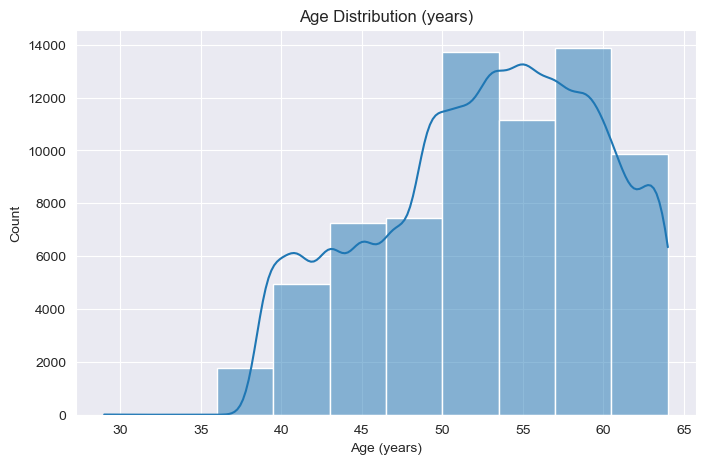

In [489]:
# Convert age from days to years
df['age_years'] = (df['age'] / 365).astype(int)
# age in years instead of age in days
df = df.drop(columns=['age'])

plt.figure(figsize=(8,5))
sns.histplot(df['age_years'], bins=10, kde=True)
plt.title('Age Distribution (years)')
plt.xlabel('Age (years)')
plt.ylabel('Count')
plt.show()

---
## 2. Height and Weight Distributions

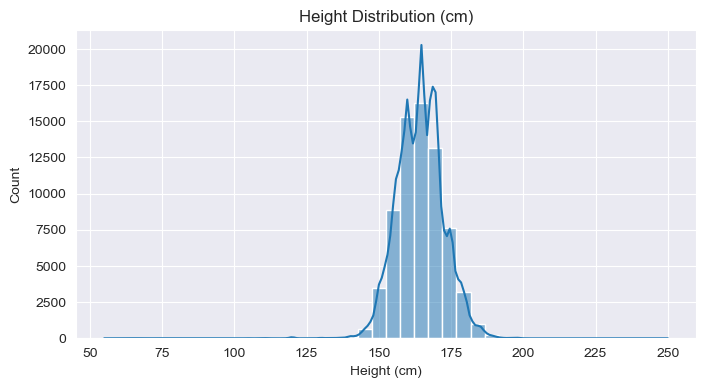

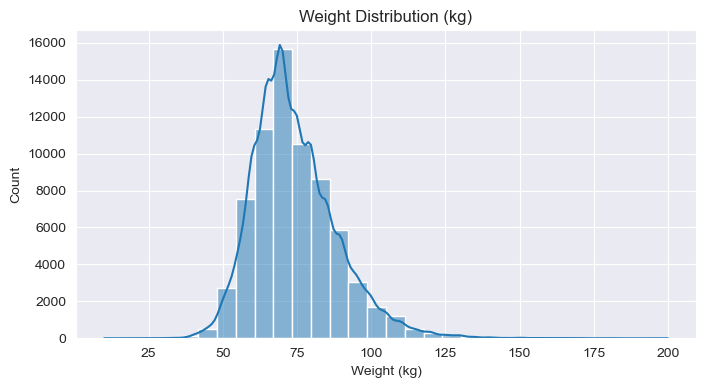

In [490]:
# Height
plt.figure(figsize=(8,4))
sns.histplot(df['height'], bins=40, kde=True, )
plt.title('Height Distribution (cm)')
plt.xlabel('Height (cm)')
plt.ylabel('Count')
plt.show()

# Weight
plt.figure(figsize=(8,4))
sns.histplot(df['weight'], bins=30, kde=True)
plt.title('Weight Distribution (kg)')
plt.xlabel('Weight (kg)')
plt.ylabel('Count')
plt.show()

---
## 3. Gender Distribution

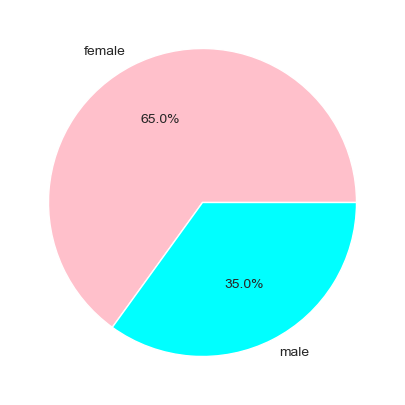

gender
1    45530
2    24470
Name: count, dtype: int64


In [491]:
count = df["gender"].value_counts()

label = ["female", "male"]
colors = ["pink", "cyan"]
plt.figure(figsize=(10,5))
plt.pie(count, labels=label, colors= colors,  autopct='%1.1f%%')
plt.show()
print(count)


## Analysis:
### 1. Height Distribution

- **Findings:**
  The height distribution shows a clear **normal (bell-shaped) curve** with most values clustered between 150–180cm.
  - The peak (mode) is around 165–170cm.
  - Few outliers exist below 125cm and above 200cm, but the majority are within a realistic adult range.
- **Interpretation:**
  This suggests a well-recorded sample for height with minimal entry errors in the central range.

### 2. Weight Distribution

- **Findings:**
  Weight is also **normally distributed** but with a longer right tail (positive skew).
  - Most individuals weigh between 55–110kg.
  - A minority of outliers are observed above 150kg and below 40kg.
- **Interpretation:**
  The distribution is typical for an adult population, but some values may be erroneous at a minimum age of 29 years old, 50kg weight is extremely unrealistic

### 3. Age Distribution

- **Findings:**
  The age distribution is **not symmetric**; it’s skewed towards older adults.
  - Most participants are between 40 and 64 years, with a pronounced peak around 55–60 years.
  - Very few participants are under 40, indicating a focus on middle-aged and older populations.
- **Interpretation:**
  This matches expectations for cardiovascular disease studies, which usually target adults at higher risk.

### 4. Gender Distribution

- **Findings:**
  The pie chart and value counts reveal a **female majority**:
  - **Females:** 45,530 (65%)
  - **Males:** 24,470 (35%)
- **Interpretation:**
  The sample is **not gender-balanced**. This could reflect either the design of the study or response rates. It’s important to consider this imbalance during model training and evaluation, as it can affect the fairness and generalizability of results.

---
## 4. Correlation Heatmap (All Numeric Features)

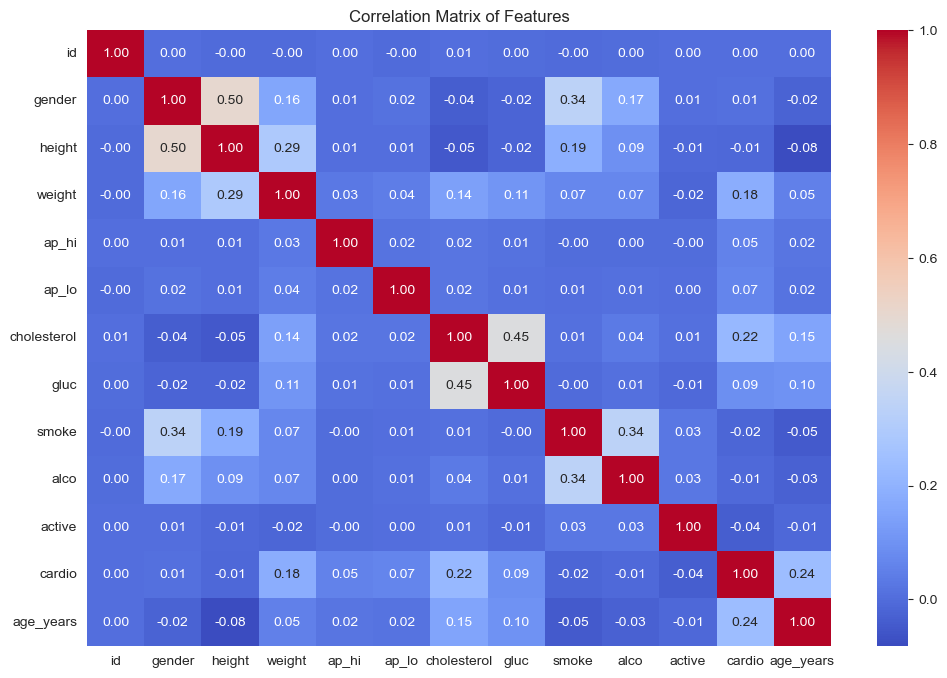

In [492]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Correlation Matrix of Features')
plt.show()

### Analysis: Correlation with Cardiovascular Disease (`cardio`):

| **Feature**   | **Correlation with `cardio`** | **Strength**     | **Interpretation / Comment**                         |
|---------------|-------------------------------|------------------|------------------------------------------------------|
| age / age_years| 0.24                          | moderate         | Older age increases risk of cardiovascular disease   |
| cholesterol   | 0.22                          | moderate         | Higher cholesterol moderately linked to disease      |
| weight        | 0.18                          | weak-moderate    | Higher weight slightly increases risk                |
| ap_hi         | 0.05                          | weak             | Systolic blood pressure has minor effect             |
| ap_lo         | 0.07                          | weak             | Diastolic blood pressure has minor effect            |
| gluc          | 0.09                          | weak             | Higher glucose slightly increases risk               |
| gender        | 0.01                          | none             | Gender has almost no linear effect                   |
| smoke         | -0.02                         | none             | Smoking not correlated (in this dataset)             |
| alco          | -0.04                         | none             | Alcohol not correlated (in this dataset)             |
| active        | -0.04                         | none             | Physical activity not correlated (in this dataset)   |

**Note:**
- The strongest correlations with cardiovascular disease are age, cholesterol, and weight — but even these are only moderate.
- Most other features show weak or no linear relationship, suggesting the need for more complex models to capture interactions.

---
# 5. Outliers

## 1. Weight outliers

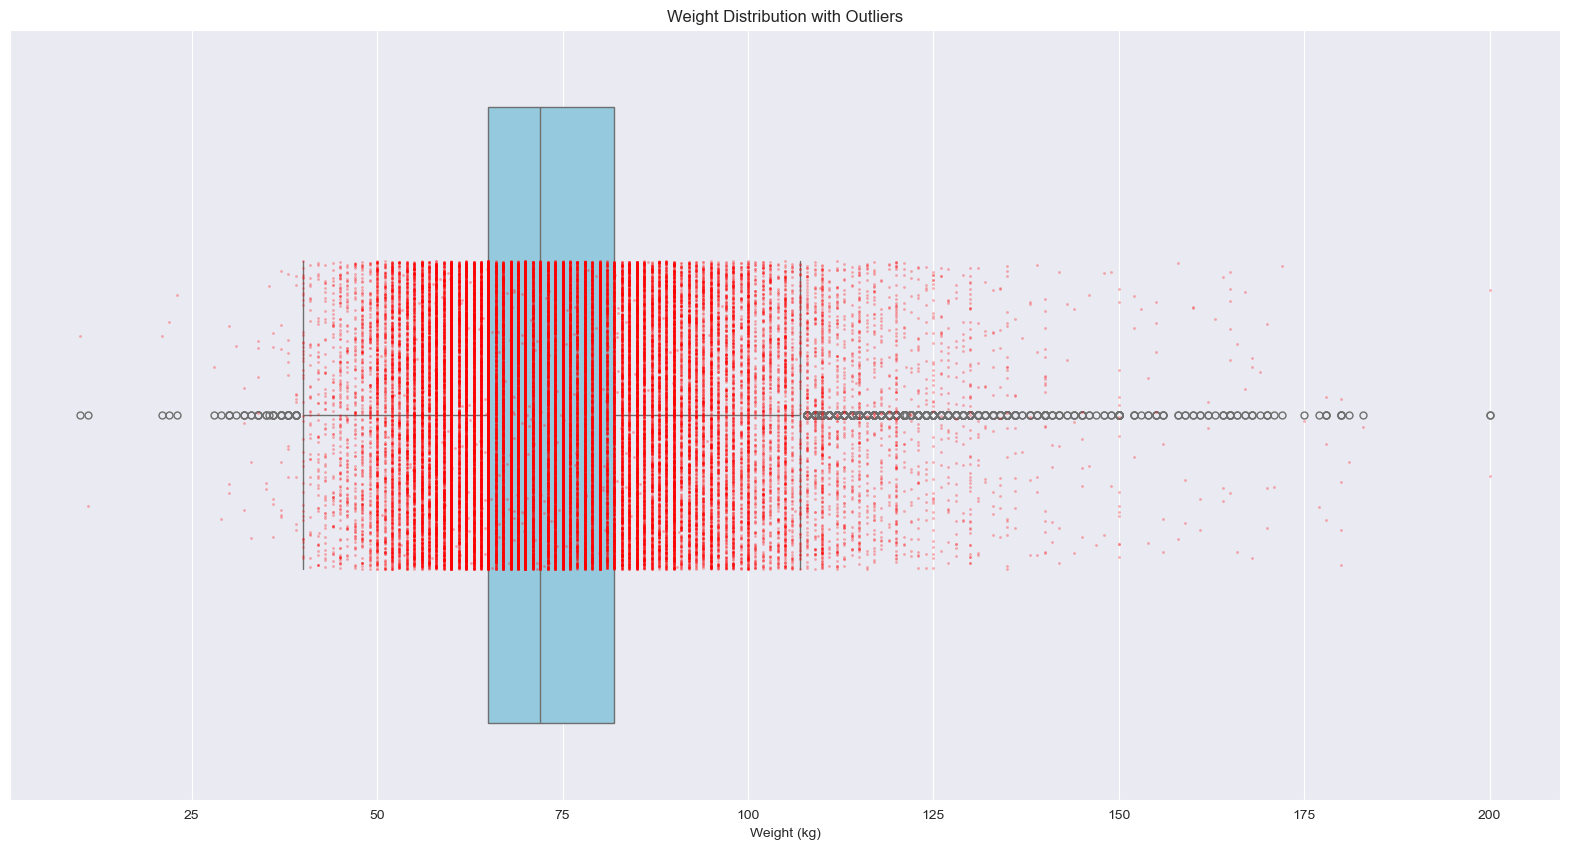

In [493]:
plt.figure(figsize=(20, 10))
sns.boxplot(x=df['weight'], color='skyblue', fliersize=5)  # shows outliers as dots
sns.stripplot(x=df['weight'], color='red', alpha=0.3, jitter=0.2, size=2)
plt.title("Weight Distribution with Outliers")
plt.xlabel("Weight (kg)")
plt.show()

## 2. Height outliers


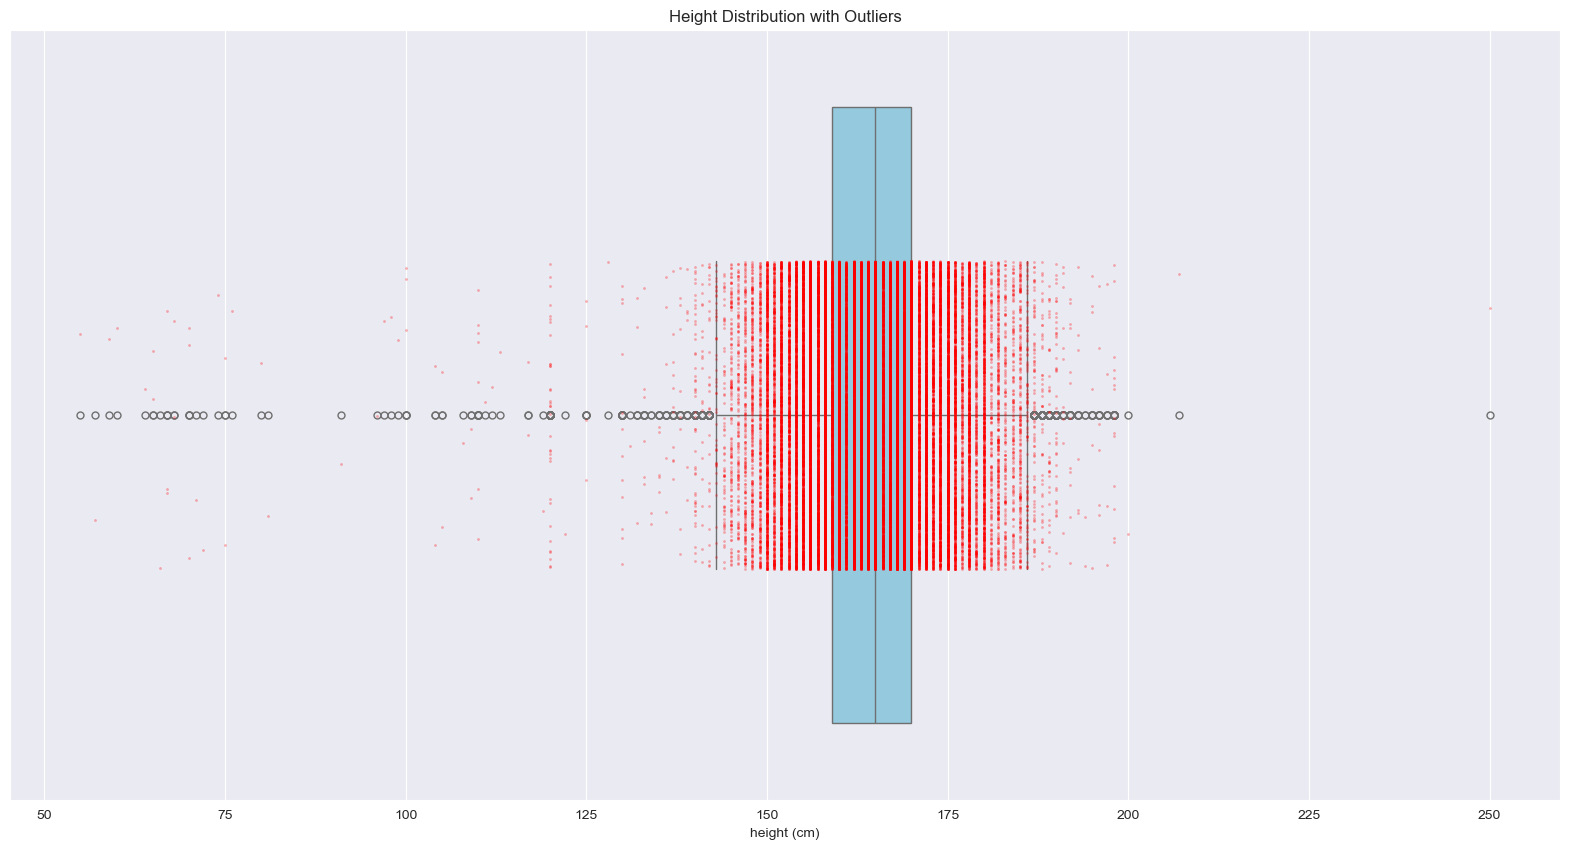

In [494]:
plt.figure(figsize=(20, 10))
sns.boxplot(x=df['height'], color='skyblue', fliersize=5)  # shows outliers as dots
sns.stripplot(x=df['height'], color='red', alpha=0.3, jitter=0.2, size=2)
plt.title("Height Distribution with Outliers")
plt.xlabel("height (cm)")
plt.show()

## 3. Age outliers

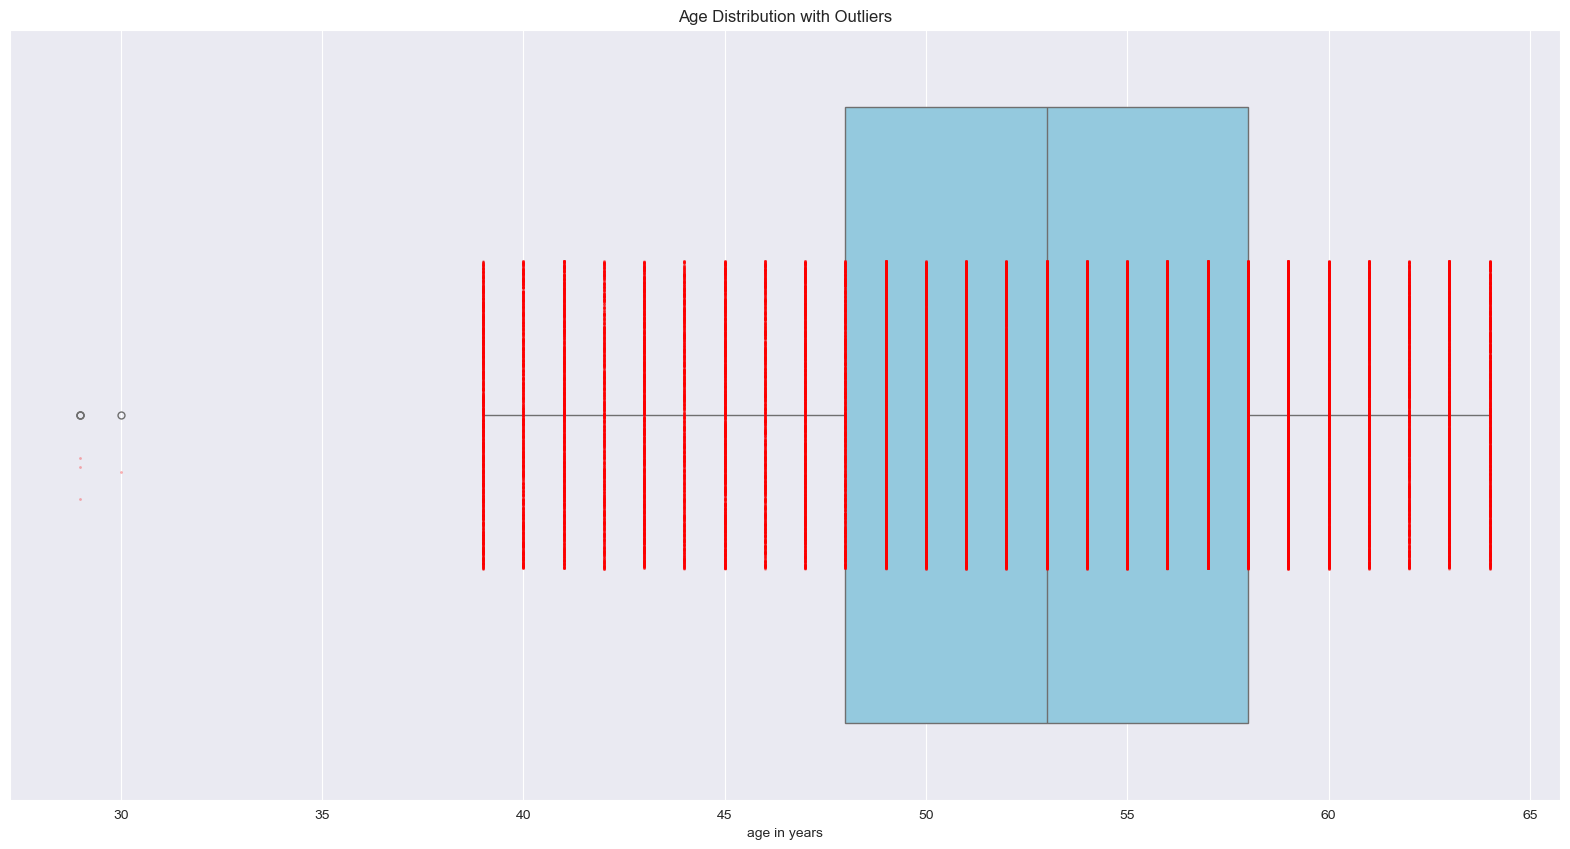

In [495]:
plt.figure(figsize=(20, 10))
sns.boxplot(x=df['age_years'], color='skyblue', fliersize=5)  # shows outliers as dots
sns.stripplot(x=df['age_years'], color='red', alpha=0.3, jitter=0.2, size=2)
plt.title("Age Distribution with Outliers")
plt.xlabel("age in years")
plt.show()

##  Systolic blood pressure, Diastolic blood pressure outliers:

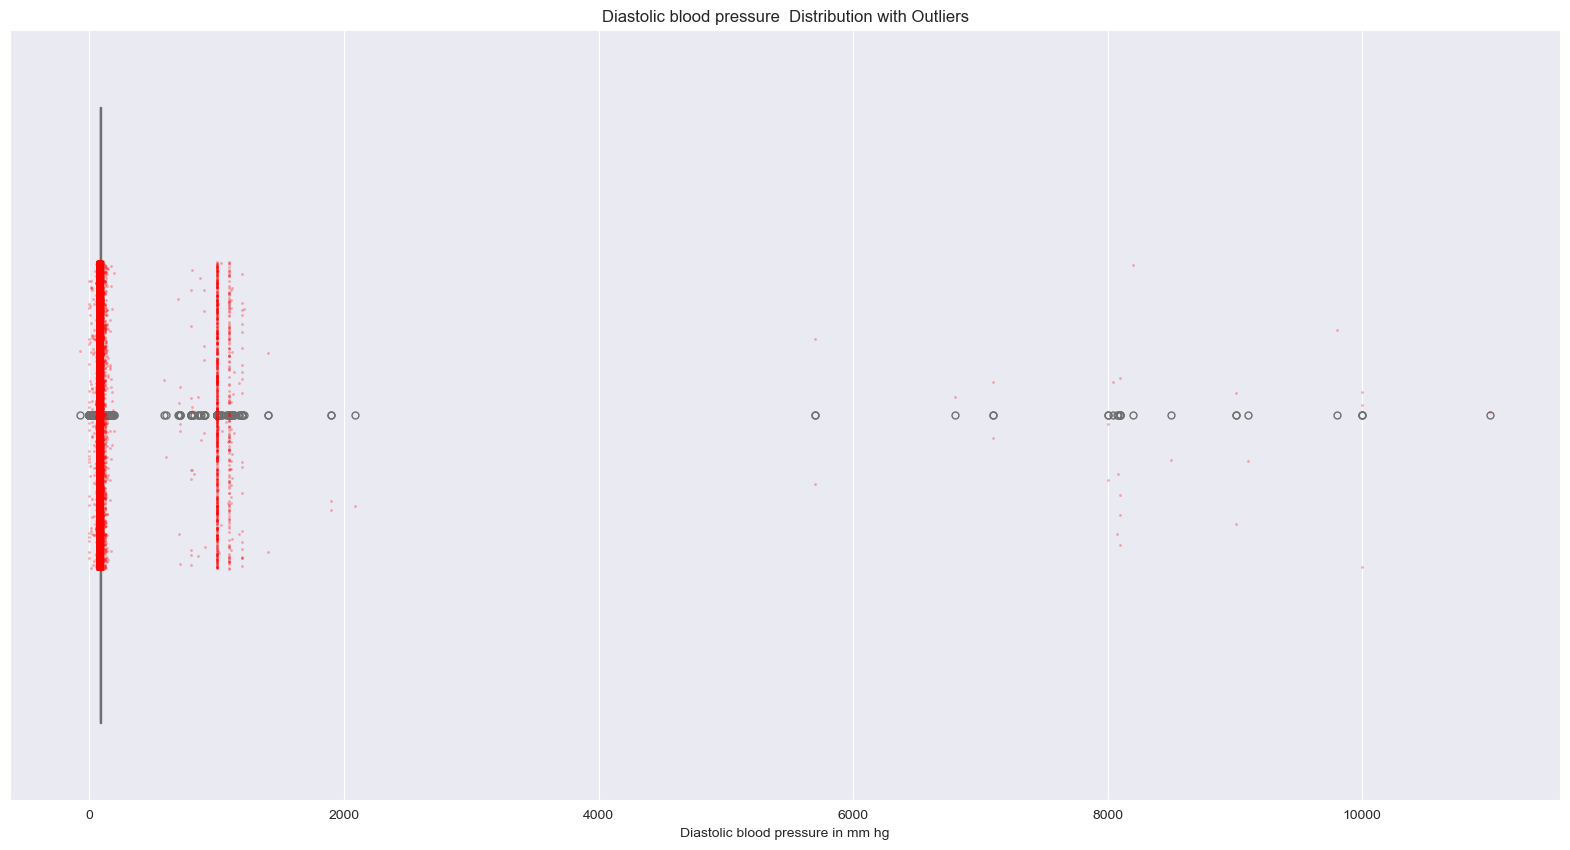

In [496]:
plt.figure(figsize=(20, 10))
sns.boxplot(x=df['ap_lo'], color='skyblue', fliersize=5)  # shows outliers as dots
sns.stripplot(x=df['ap_lo'], color='red', alpha=0.3, jitter=0.2, size=2)
plt.title("Diastolic blood pressure  Distribution with Outliers")
plt.xlabel("Diastolic blood pressure in mm hg")
plt.show()

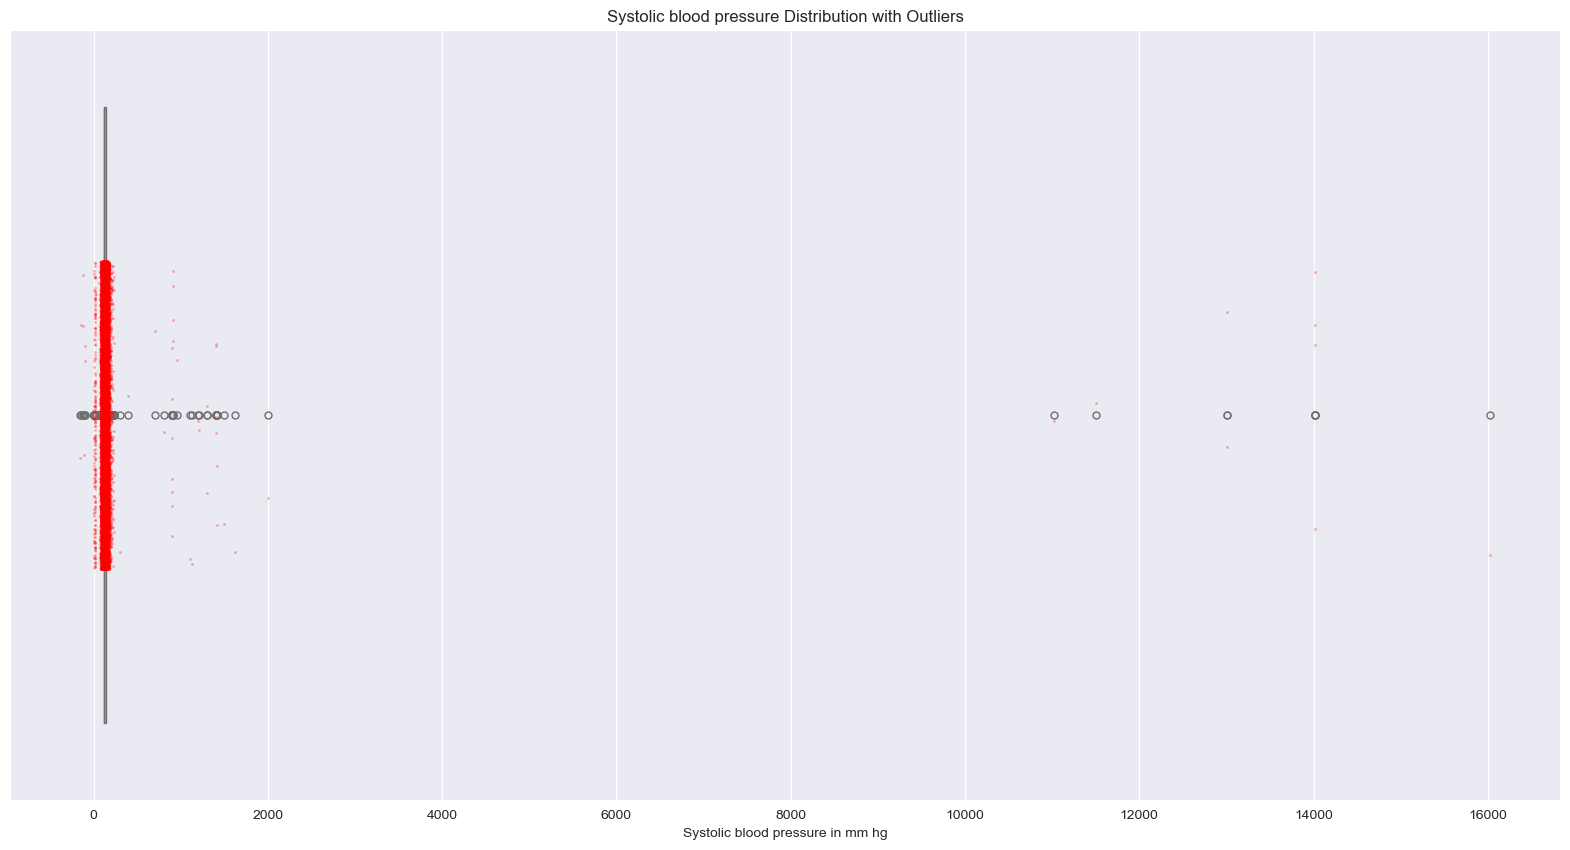

In [497]:
plt.figure(figsize=(20, 10))
sns.boxplot(x=df['ap_hi'], color='skyblue', fliersize=5)  # shows outliers as dots
sns.stripplot(x=df['ap_hi'], color='red', alpha=0.3, jitter=0.2, size=2)
plt.title("Systolic blood pressure Distribution with Outliers")
plt.xlabel("Systolic blood pressure in mm hg")
plt.show()

## Analysis

### Height, Weight, and Age Distributions

- **Outliers Detected:**
  All three distributions—height, weight, and age—show clear evidence of outliers.
  - **Height:**
    - Most values cluster tightly around 150–180cm, but there are extreme values below 100cm and above 200cm, which are likely data entry errors or rare pathological cases.
  - **Weight:**
    - The majority of observations fall between 50–110kg, yet there are values far below 40kg and above 150kg, some even reaching extreme ranges unlikely for adults.
  - **Age:**
    - Age distribution is more compact, centered around 45–60 years, but there are some outliers at both the lower and upper ends of the range.

- **Clinical or Data Quality Relevance:**
  - Many of these outlier values are probably **implausible in a clinical context** and suggest either data entry issues or rare extreme cases.
  - Including such outliers in further modeling can bias results and distort statistical inferences.

### Blood Pressure Distributions (Systolic and Diastolic)

- **Severe Outliers:**
  - Both systolic and diastolic blood pressure variables show values that are biologically impossible (e.g., >10,000mmHg), confirming severe data quality problems.
  - The bulk of values are concentrated around expected physiological ranges (e.g., 80–200mmHg), but the presence of these outliers is visually clear and concerning.

- **Actionable Recommendation:**
  - Outliers should be **systematically removed or winsorized** before further analysis or modeling.
  - Failure to do so may negatively affect any machine learning model’s performance and clinical interpretability.


All variables examined exhibit significant outliers that are likely the result of data entry errors. Identifying and appropriately handling these outliers is a crucial next step in the data cleaning process to ensure robust and meaningful analytical results.

### References
Johnson, H. M., et al. "Maintaining Normal Blood Pressure Across the Life Course." *Current Hypertension Reports* (2021): 1-3. [Link](hhttps://pmc.ncbi.nlm.nih.gov/articles/PMC8564773/?.com)

---
# 6. Cardiovascular Disease Correlation Analysis
- who has it, who does not?

## Age Distribution of Patients with/without Cardiovascular Disease

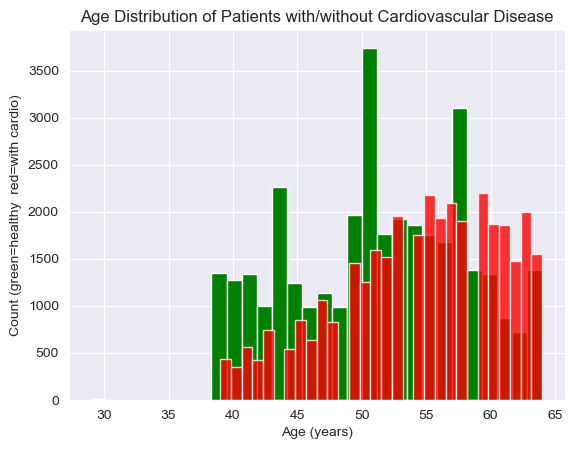

In [498]:
cardio_patients = df[df['cardio'] == 1]
no_cardio_patients = df[df['cardio'] == 0]

plt.hist(no_cardio_patients["age_years"], bins=30, color="green")
plt.hist(cardio_patients["age_years"], bins=30, color="red", alpha=0.8)

plt.title("Age Distribution with Outliers")
plt.title("Age Distribution of Patients with/without Cardiovascular Disease")
plt.xlabel("Age (years)")
plt.ylabel("Count (green=healthy  red=with cardio)")
plt.show()

### Analysis:

#### Age Distribution by Cardiovascular Disease Status
- **Interpretation:**
  The histogram shows that **healthy individuals (green)** are more prevalent at younger ages, while the **proportion of patients with cardiovascular disease (red)** increases with age.
  - After age 50, the number of individuals with cardiovascular disease begins to surpass the number of healthy individuals.
  - This trend reflects the well-established medical finding that **cardiovascular disease risk rises significantly with age**  (Rodgers, J.L.,et al 2019)

#### References:
**Source:** Rodgers, J.L., et al *Cardiovascular Risks Associated with Gender and Aging*. Aging and Disease. 2019 Apr 27;6(2):19. [Link](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6616540/)

## Proportion of Patients with/without Cardiovascular Disease:

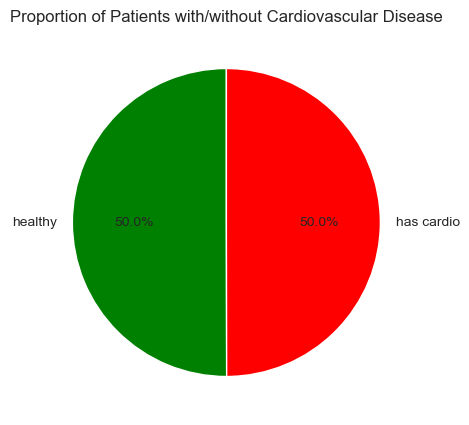

num_with_cardio: 
34979
num_without_cardio: 
35021


In [499]:
# Count how many with and without cardio
num_with_cardio = (df['cardio'] == 1).sum()
num_without_cardio = (df['cardio'] == 0).sum()

# Prepare values and labels in the order you want
sizes = [num_without_cardio, num_with_cardio]
labels = ["healthy", "has cardio"]
colors = ["green", "red"]

plt.figure(figsize=(5,5))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title("Proportion of Patients with/without Cardiovascular Disease")
plt.show()
print("num_with_cardio: ")
print(num_with_cardio)
print("num_without_cardio: ")
print(num_without_cardio)


## Proportion of Sick/Healthy by Gender


sick men:  12363
sick women:  22616
Proportion of men with cardio: 0.5
Proportion of women with cardio: 0.5


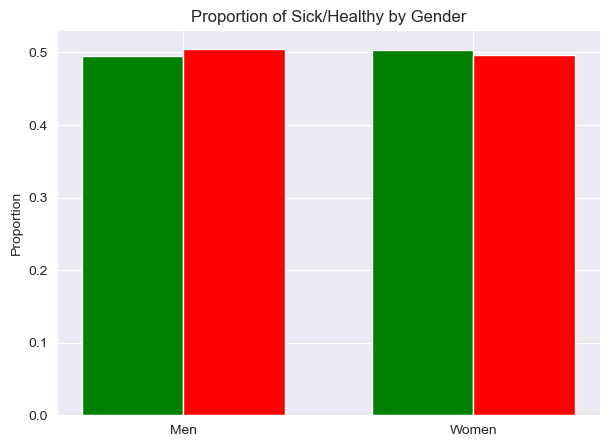

In [500]:
# Total counts
total_men = (df['gender'] == 2).sum()
total_women = (df['gender'] == 1).sum()

# With cardio
sick_men = ((df['gender'] == 2) & (df['cardio'] == 1)).sum()
sick_women = ((df['gender'] == 1) & (df['cardio'] == 1)).sum()

# healthy men and women
healthy_men = ((df['gender'] == 2) & (df['cardio'] == 0)).sum()
healthy_women = ((df['gender'] == 1) & (df['cardio'] == 0)).sum()

# Rates (as decimals or percent)
sick_men_rate = sick_men / total_men
sick_women_rate = sick_women / total_women
healthy_men_rate = healthy_men / total_men
healthy_women_rate = healthy_women / total_women


print("sick men: ", sick_men)
print("sick women: ", sick_women)

print(f"Proportion of men with cardio: {sick_men_rate:.1f}")
print(f"Proportion of women with cardio: {healthy_women_rate:.1f}")

labels = ['Men', 'Women']
healthy = [healthy_men_rate, healthy_women_rate]

sick = [sick_men_rate, sick_women_rate]

x = np.arange(len(labels))
width = 0.35
plt.figure(figsize=(7,5))
plt.bar(x - width/2, healthy, width, label='Healthy', color='green')
plt.bar(x + width/2, sick, width, label='Sick', color='red')
plt.xticks(x, labels)
plt.ylabel('Proportion')
plt.title('Proportion of Sick/Healthy by Gender')
plt.show()



### Analysis:
#### Analysis of Gender and Cardiovascular Disease Distribution

Our dataset contains 70,000 patients, with almost equal numbers of individuals diagnosed with cardiovascular disease (34,979) and without (35,021).

- There are **12,363 men** and **22,616 women** with cardiovascular disease.
- The **proportion of men with the disease** is approximately **50%** (12,363 out of 24,470 total men).
- The **proportion of women with the disease** is also approximately **50%** (22,616 out of 45,530 total women).

Although the absolute number of women with cardiovascular disease is higher, this is due to the larger number of women in the dataset. The **risk (prevalence rate) of cardiovascular disease is nearly identical for men and women** in this dataset.

**Conclusion:**
> The dataset is well-balanced in terms of disease presence and shows no substantial gender difference in the relative risk of cardiovascular disease.

## cardiovascular disease and Age Correlation

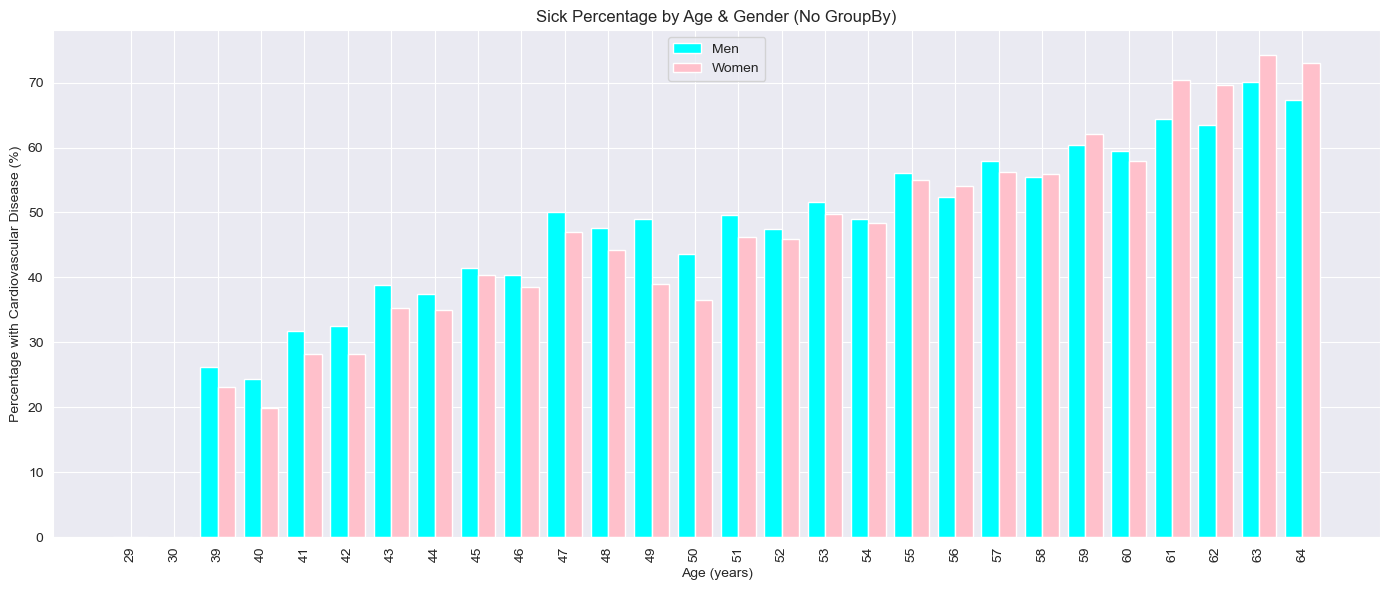

In [501]:
# create a list with all ages provided in the database with no duplications
ages = sorted(df['age_years'].unique()) # is a list of all unique age values in your dataset, sorted in order
# create empty lists to save sick men and women
pct_sick_men = []
pct_sick_women = []

# for each year/age in our ages list, we save a list for women a men at this age
for age in ages:

                # age of person == list age     and     gender is male
    men = df[    ( df['age_years'] == age )     &     ( df['gender'] == 2 )   ]
                # age of person == list age     and    gender is female
    women = df[  ( df ['age_years'] == age)     &     ( df['gender'] == 1 )   ]

# do the following:

     # Calculate percentage sick for women at this age
    men_total = len(men)
    men_sick = men['cardio'].sum() # number of sick men




    if men_total > 0: # if there are men at this age:
        pct_sick_men.append(100 * men_sick / men_total) # calculate % and add it to the list
    else:
        pct_sick_men.append(np.nan)  # No men at this age, ad a nan

    # Calculate percentage sick for women at this age
    women_total = len(women)
    women_sick = women['cardio'].sum()




    if women_total > 0: # if there are men at this age:
        pct_sick_women.append(100 * women_sick / women_total)
    else:
        pct_sick_women.append(np.nan)  # No women at this age

# Plot
x = np.arange(len(ages)) # len(ages) gives you how many different ages there are
plt.figure(figsize=(14,6))
plt.bar(x - 0.2, pct_sick_men, width=0.4, color='cyan', label='Men')
plt.bar(x + 0.2, pct_sick_women, width=0.4, color='pink', label='Women')
plt.xlabel('Age (years)')
plt.ylabel('Percentage with Cardiovascular Disease (%)')
plt.title('Sick Percentage by Age & Gender (No GroupBy)')
plt.xticks(x, ages, rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

### Analysis:
- **Trend:**
  - The percentage of people with cardiovascular disease increases sharply with age for both men and women.
  - At younger ages (around 30–45), disease rates are moderate (20–40%).
  - After age 55, the percentage rises steeply—over 50%, reaching up to 70%+ for the oldest ages.

- **Gender differences:**
  - Among younger adults, men have slightly higher disease rates.
  - In older age groups (60+), the difference between men and women gets smaller; sometimes, women even surpass men.

- Although **Age** is the most important predictor for cardiovascular disease in this data(as shown in the heatmap), followed by **cholesterol** and **weight**, it still does not offer us a high correlation to Cardiovascular disease.
- Disease prevalence is high for both genders at older ages, but men are a bit more affected at younger ages.
- Other features show only minor influence—at least in linear correlation.
